In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [6]:
data = pd.read_csv("energydata_complete.csv")

In [7]:
data.drop(['date','lights'],axis = 1,inplace = True)

In [8]:
data.head(10)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,50,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,17.133333,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,60,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,17.100000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,60,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,17.100000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,60,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,17.166667,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,70,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,46.096667,17.100000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


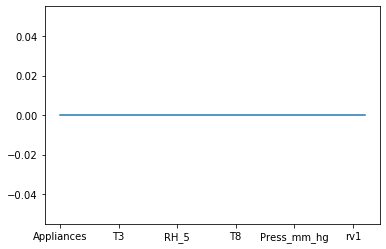

In [10]:
data.isnull().sum().plot()

In [20]:
def residuals(y_true,y_pred):
    residuals = np.sum(np.square(y_true - y_pred))
    return np.round(residuals,3)

In [11]:
sc = MinMaxScaler()
var = data.drop(['Appliances'],axis = 1)
scaled_data = sc.fit_transform(var)

In [12]:
features = scaled_data
target = data.Appliances
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [22]:
def metrics(y_true,y_pred):
    print('RMSE : ', np.sqrt(mean_squared_error(y_true,y_pred)))
    print('MAE : ',mean_absolute_error(y_true,y_pred))
    print('R2: ',r2_score(y_true,y_pred))
    print('RSS : ', residuals(y_true,y_pred))

# LASSO REGRESSION

In [23]:
lasso = Lasso(alpha =0.001,random_state=42).fit(X_train,y_train)
y_lasso = lasso.predict(X_test)

In [24]:
metrics(y_test,y_lasso)

RMSE :  93.64067509185512
MAE :  53.630215435311065
R2:  0.14889857033860565
RSS :  51918738.683


# RIDGE REGRESSION

In [26]:
ridge = Ridge(alpha=0.4).fit(X_train,y_train)
y_ridge = ridge.predict(X_test)

In [27]:
metrics(y_test,y_ridge)

RMSE :  93.66122703951963
MAE :  53.593567049788454
R2:  0.14852493545092582
RSS :  51941531.093


# Linear REGRESSION

In [30]:
Linear = LinearRegression(normalize=False).fit(X_train,y_train)
y_linear = Linear.predict(X_test)

In [39]:
linear_weight = pd.DataFrame(Linear.coef_,index=data.columns[1:],columns=['values'])

In [40]:
linear_weight.sort_values('values')

,values
RH_2,-488.666805
T_out,-344.389845
T2,-252.710373
T9,-203.236627
RH_8,-168.627161
RH_out,-83.107599
RH_7,-47.736592
RH_9,-42.586339
T5,-16.752822
T1,-3.510725


In [42]:
metrics(y_test,y_linear)

RMSE :  93.6404609399803
MAE :  53.64297765584947
R2:  0.14890246319303513
RSS :  51918501.212


In [44]:
X = data.T2
scaler = MinMaxScaler()

X = scaler.fit_transform(np.array(X).reshape(-1,1))
y = data.T6

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
Linear = LinearRegression(normalize=False).fit(X_train,y_train)
y_linear = Linear.predict(X_test)

In [49]:
metrics(y_test,y_linear)

RMSE :  3.630315129680444
MAE :  2.8229401131313034
R2:  0.6427789637197382
RSS :  78033.972
